In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
Asma = np.load('Treino_teste/Asma.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = Asma['X_treino'], Asma['X_teste'], Asma['y_treino'], Asma['y_teste'], list(Asma['feature_names'])

In [34]:
len(X_treino)

25015

In [35]:
Asma_over = np.load('Treino_teste/Asma_Over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= Asma_over['X_treino'], Asma_over['X_teste'], Asma_over['y_treino'], Asma_over['y_teste'], list(Asma_over['feature_names'])

In [36]:
len(X_treino_over)

46908

In [37]:
Asma_under = np.load('Treino_teste/Asma_Under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = Asma_under['X_treino'], Asma_under['X_teste'], Asma_under['y_treino'], Asma_under['y_teste'], list(Asma_under['feature_names'])

In [38]:
len(X_treino_under)

24587

In [39]:
Asma_random_under = np.load('Treino_teste/Asma_RD_Under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = Asma_random_under['X_treino'], Asma_random_under['X_teste'], Asma_random_under['y_treino'], Asma_random_under['y_teste'], list(Asma_random_under['feature_names'])

In [40]:
len(X_treino_rd_under)

3122

In [41]:
Asma_DSTO = np.load('Treino_teste/Asma_DSTO.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = Asma_DSTO['X_treino'], Asma_DSTO['X_teste'], Asma_DSTO['y_treino'], Asma_DSTO['y_teste'], list(Asma_DSTO['feature_names'])

In [42]:
len(X_treino_DSTO)

46908

## Parametros e funcoes

In [43]:
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
    'min_samples_split': [1, 2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

In [44]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


# Modelos

### Modelo Padrao

In [45]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 8, 'min_samples_split': 8}
Melhor pontuação de validação cruzada: 0.94


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1750 fits failed out of a total of 10500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/lib/python3/dist-packages/sklearn/utils/_param_validation.py", line 95, in vali

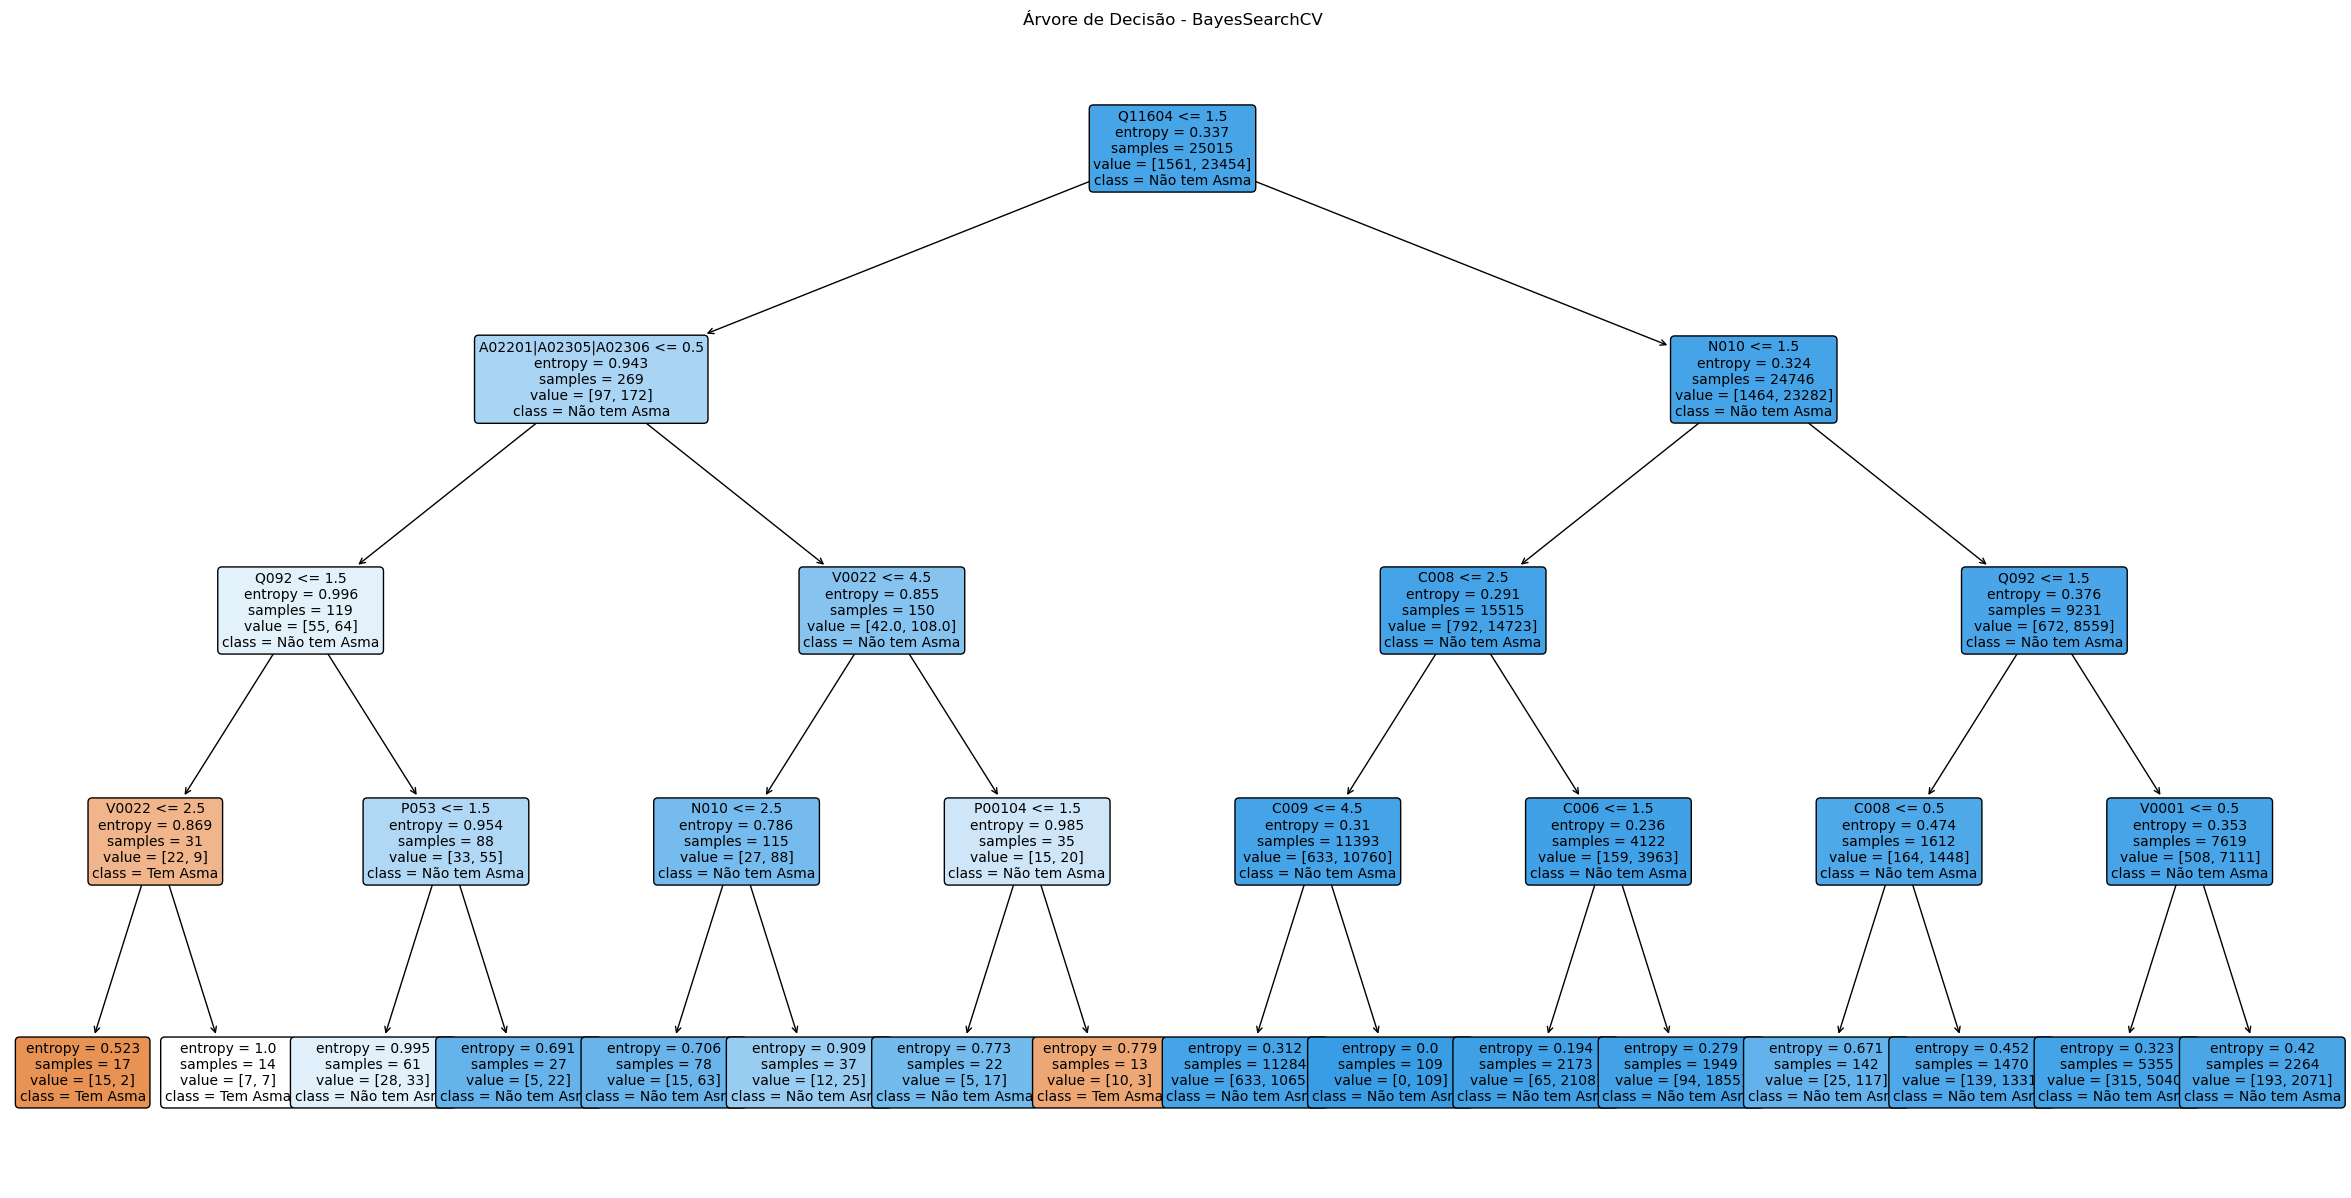

In [46]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

### Resultados

In [47]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.94


In [48]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.75      0.01      0.02       633
           2       0.94      1.00      0.97     10089

    accuracy                           0.94     10722
   macro avg       0.85      0.50      0.49     10722
weighted avg       0.93      0.94      0.91     10722



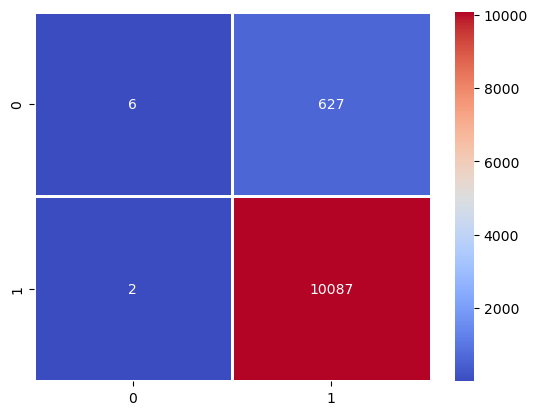

In [49]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### OverSampling

In [50]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 4}
Melhor pontuação de validação cruzada: 0.70


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1750 fits failed out of a total of 10500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/lib/python3/dist-packages/sklearn/utils/_param_validation.py", line 95, in vali

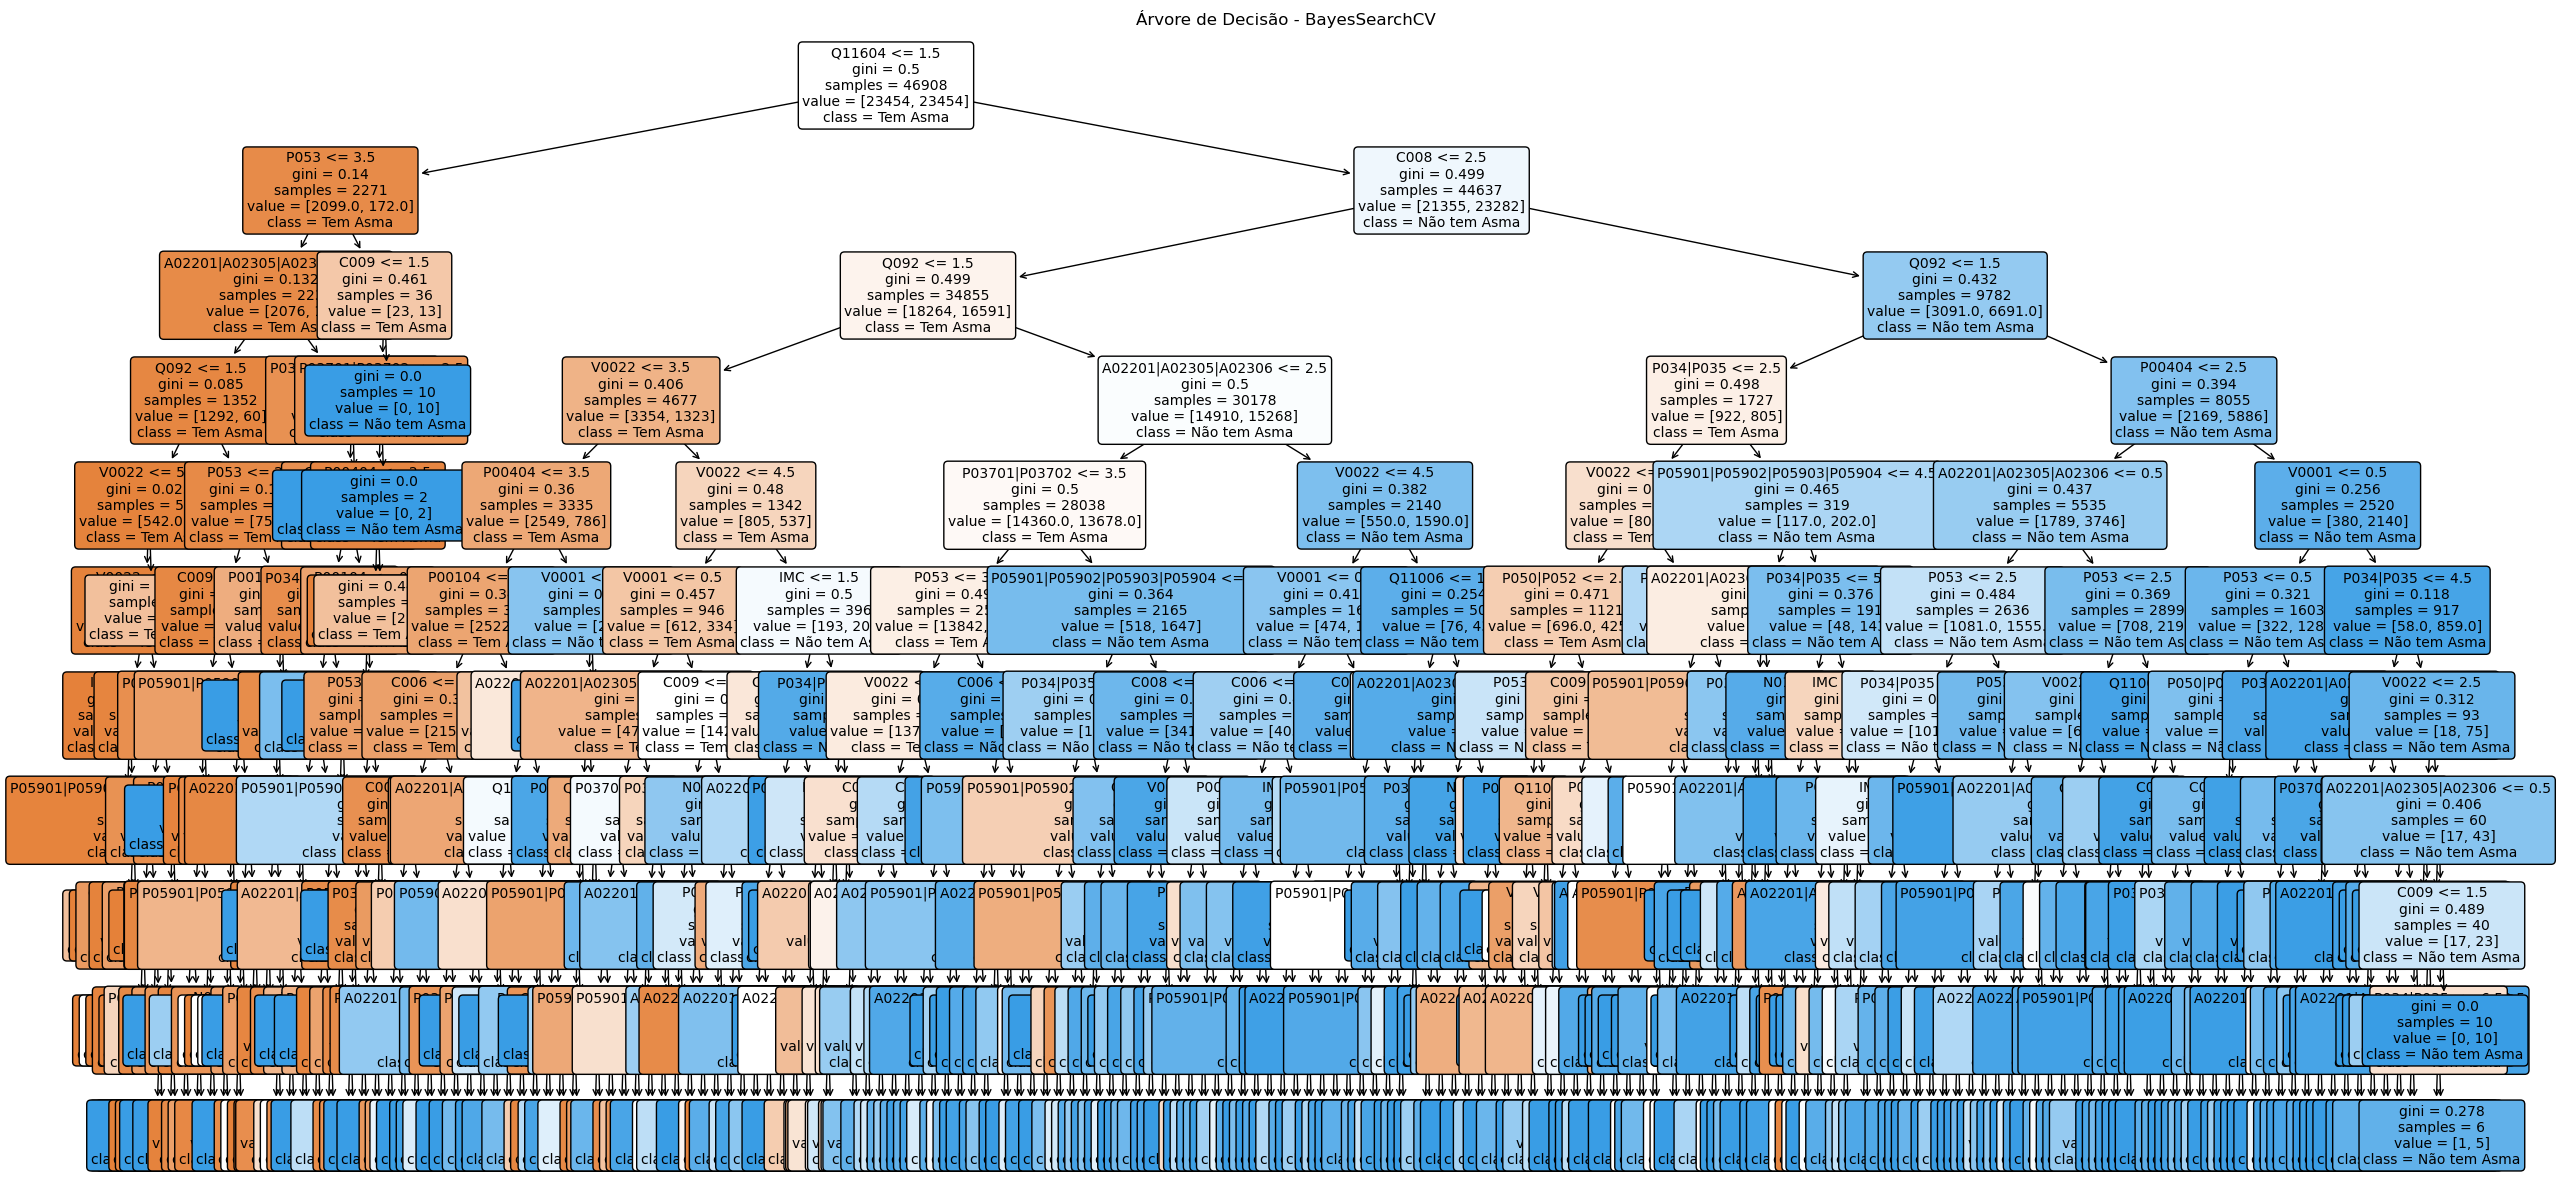

In [51]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [52]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [53]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.07      0.45      0.12       633
           2       0.95      0.61      0.74     10089

    accuracy                           0.60     10722
   macro avg       0.51      0.53      0.43     10722
weighted avg       0.89      0.60      0.71     10722



### UnderSampling

In [54]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.94


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1750 fits failed out of a total of 10500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/lib/python3/dist-packages/sklearn/utils/_param_validation.py", line 95, in vali

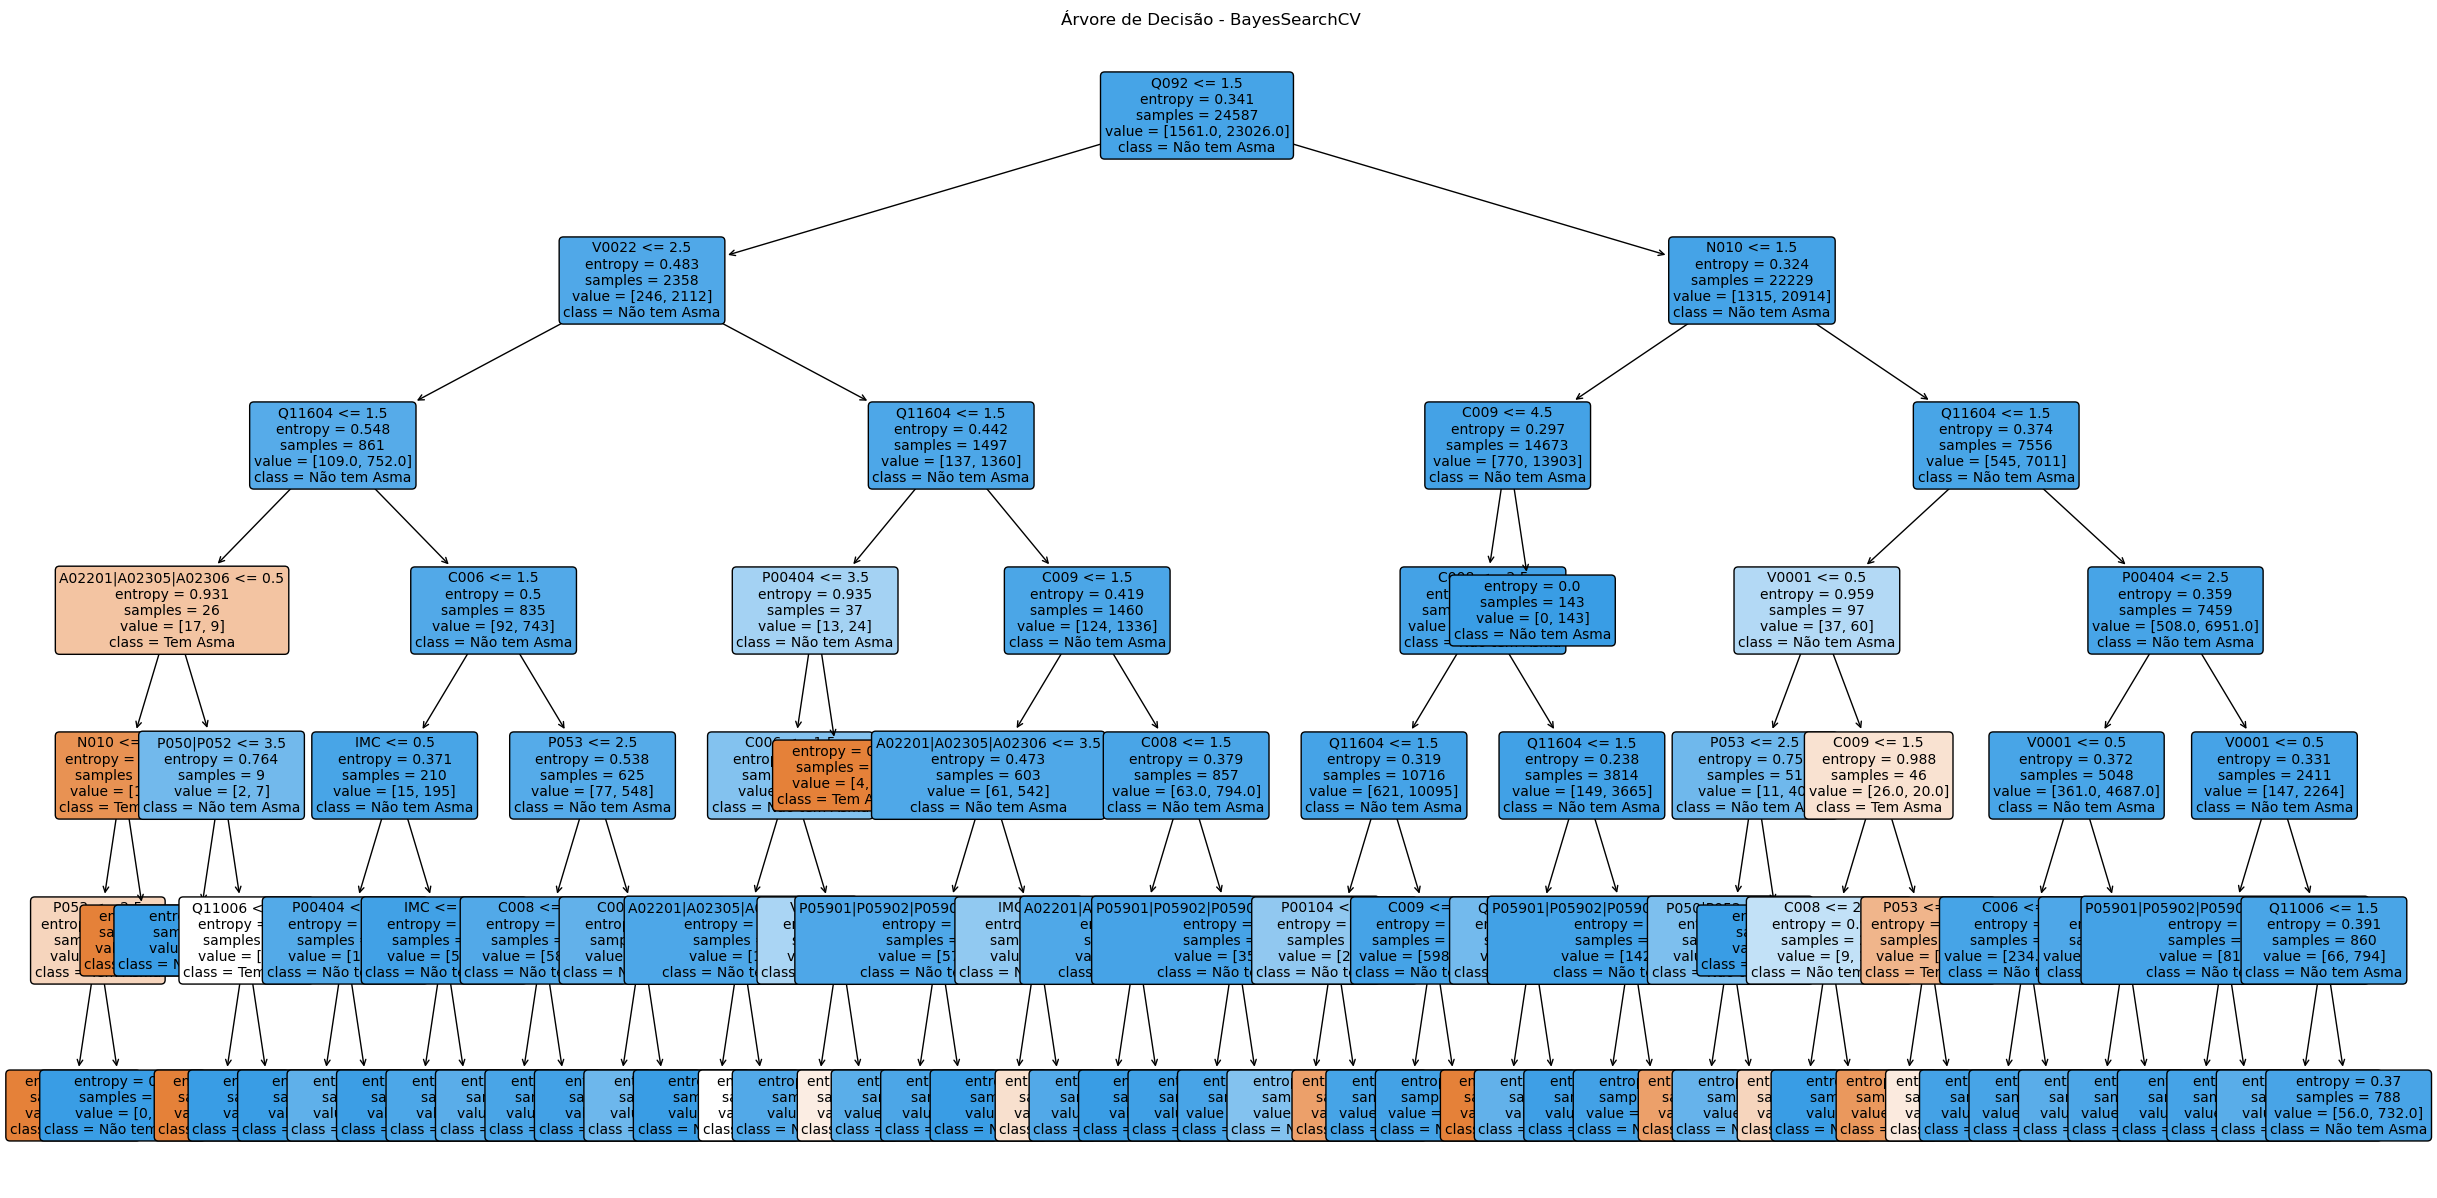

In [55]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [56]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [57]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.49      0.03      0.06       633
           2       0.94      1.00      0.97     10089

    accuracy                           0.94     10722
   macro avg       0.72      0.51      0.51     10722
weighted avg       0.92      0.94      0.92     10722



### Random UnderSampling

In [58]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.2, 'min_samples_leaf': 2, 'min_samples_split': 10}
Melhor pontuação de validação cruzada: 0.56


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1750 fits failed out of a total of 10500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/lib/python3/dist-packages/sklearn/utils/_param_validation.py", line 95, in vali

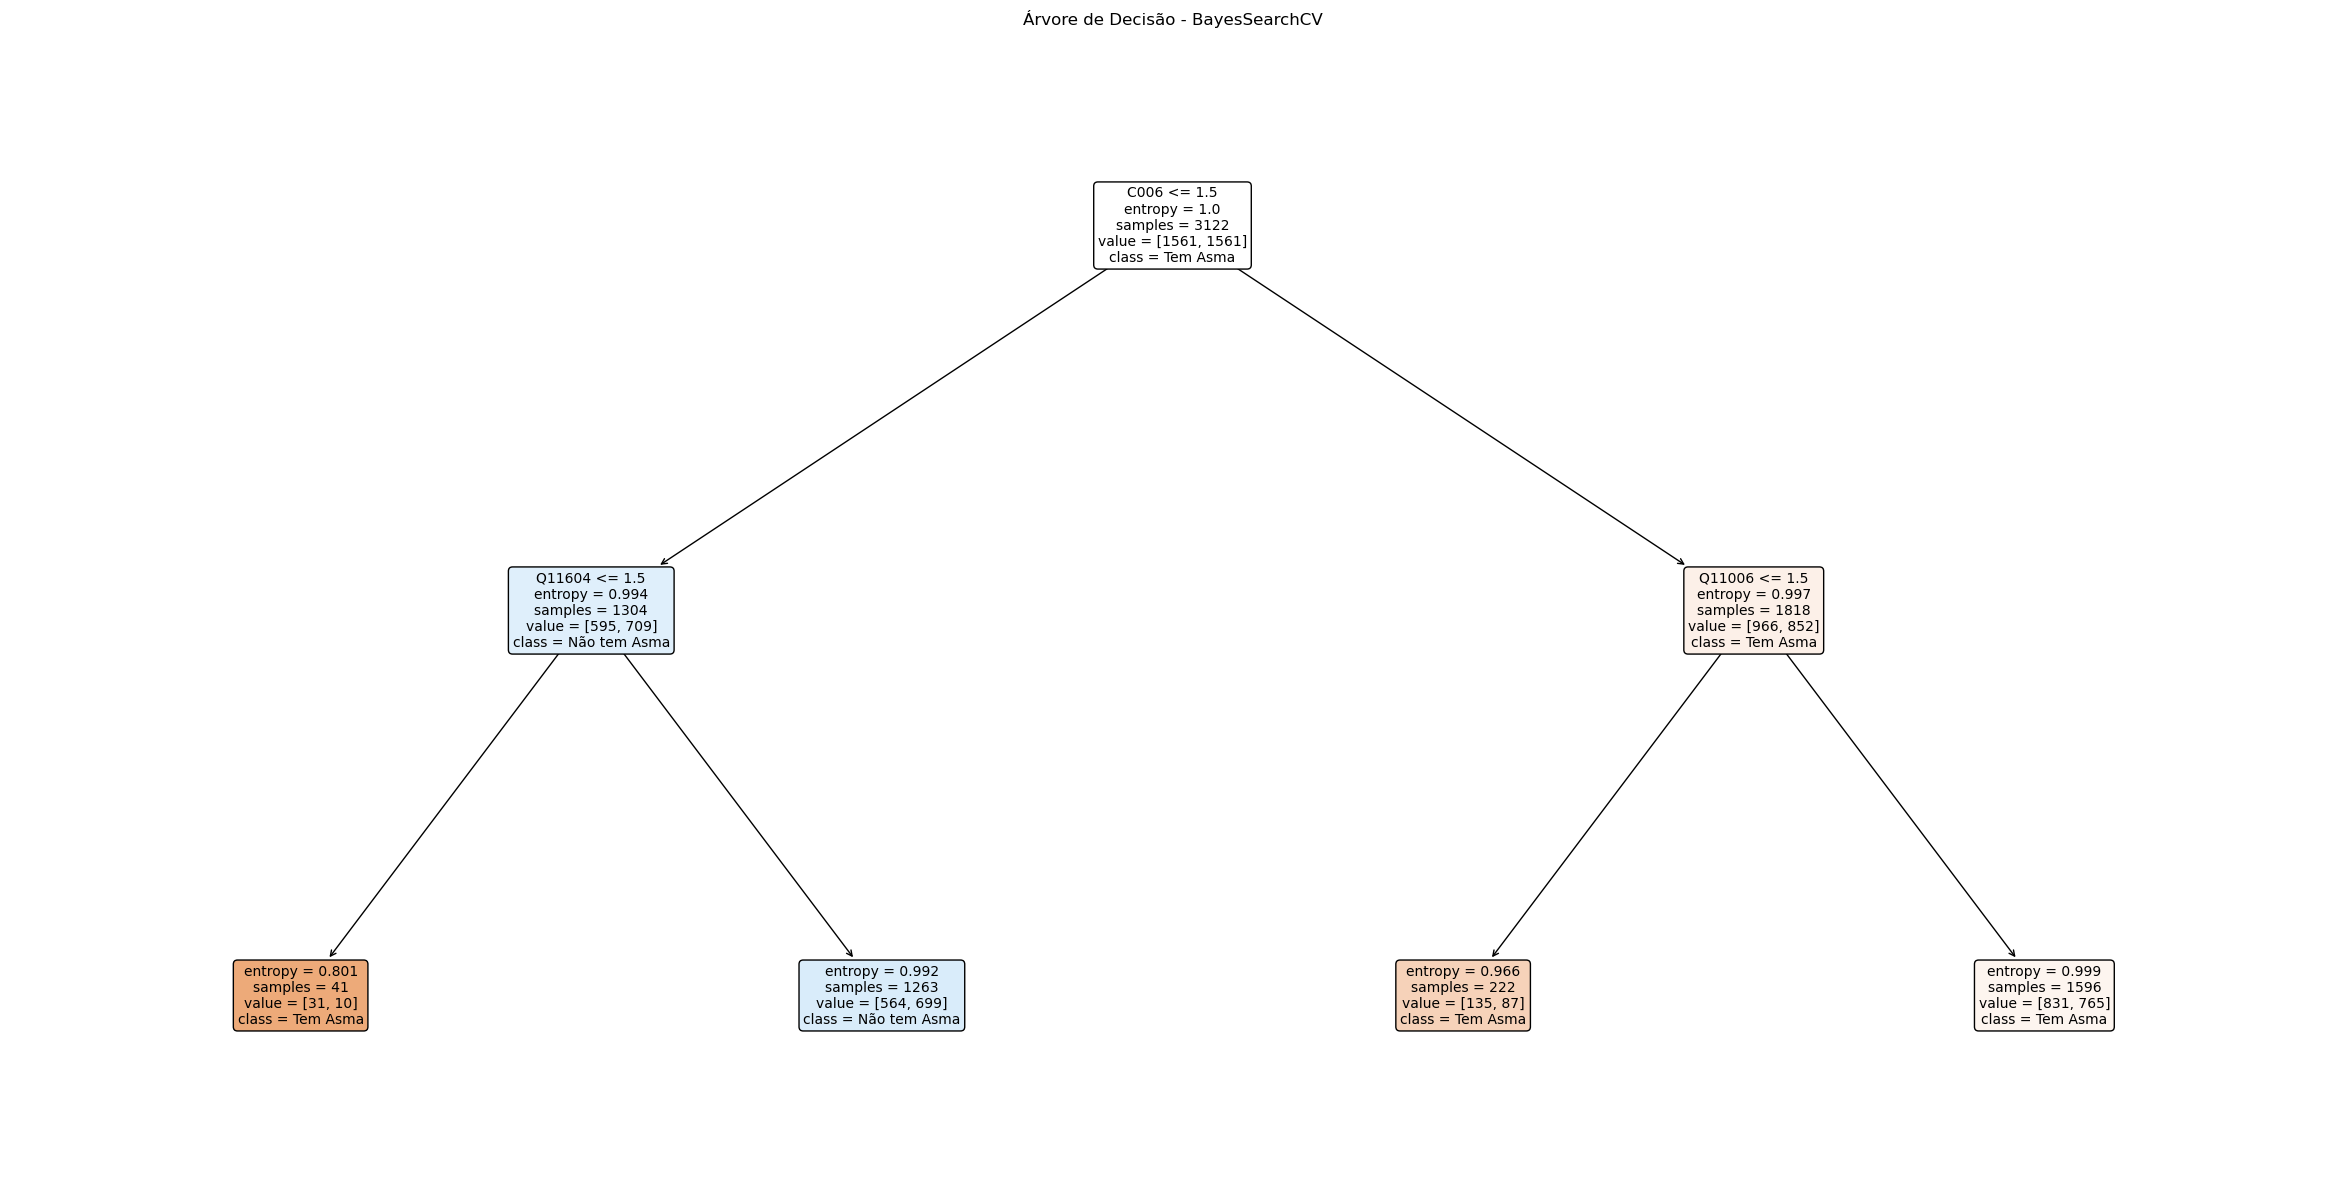

In [59]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [60]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [61]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.07      0.66      0.13       633
           2       0.96      0.47      0.63     10089

    accuracy                           0.49     10722
   macro avg       0.52      0.57      0.38     10722
weighted avg       0.90      0.49      0.60     10722



### DSTO

In [62]:
grid_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))

KeyboardInterrupt: 

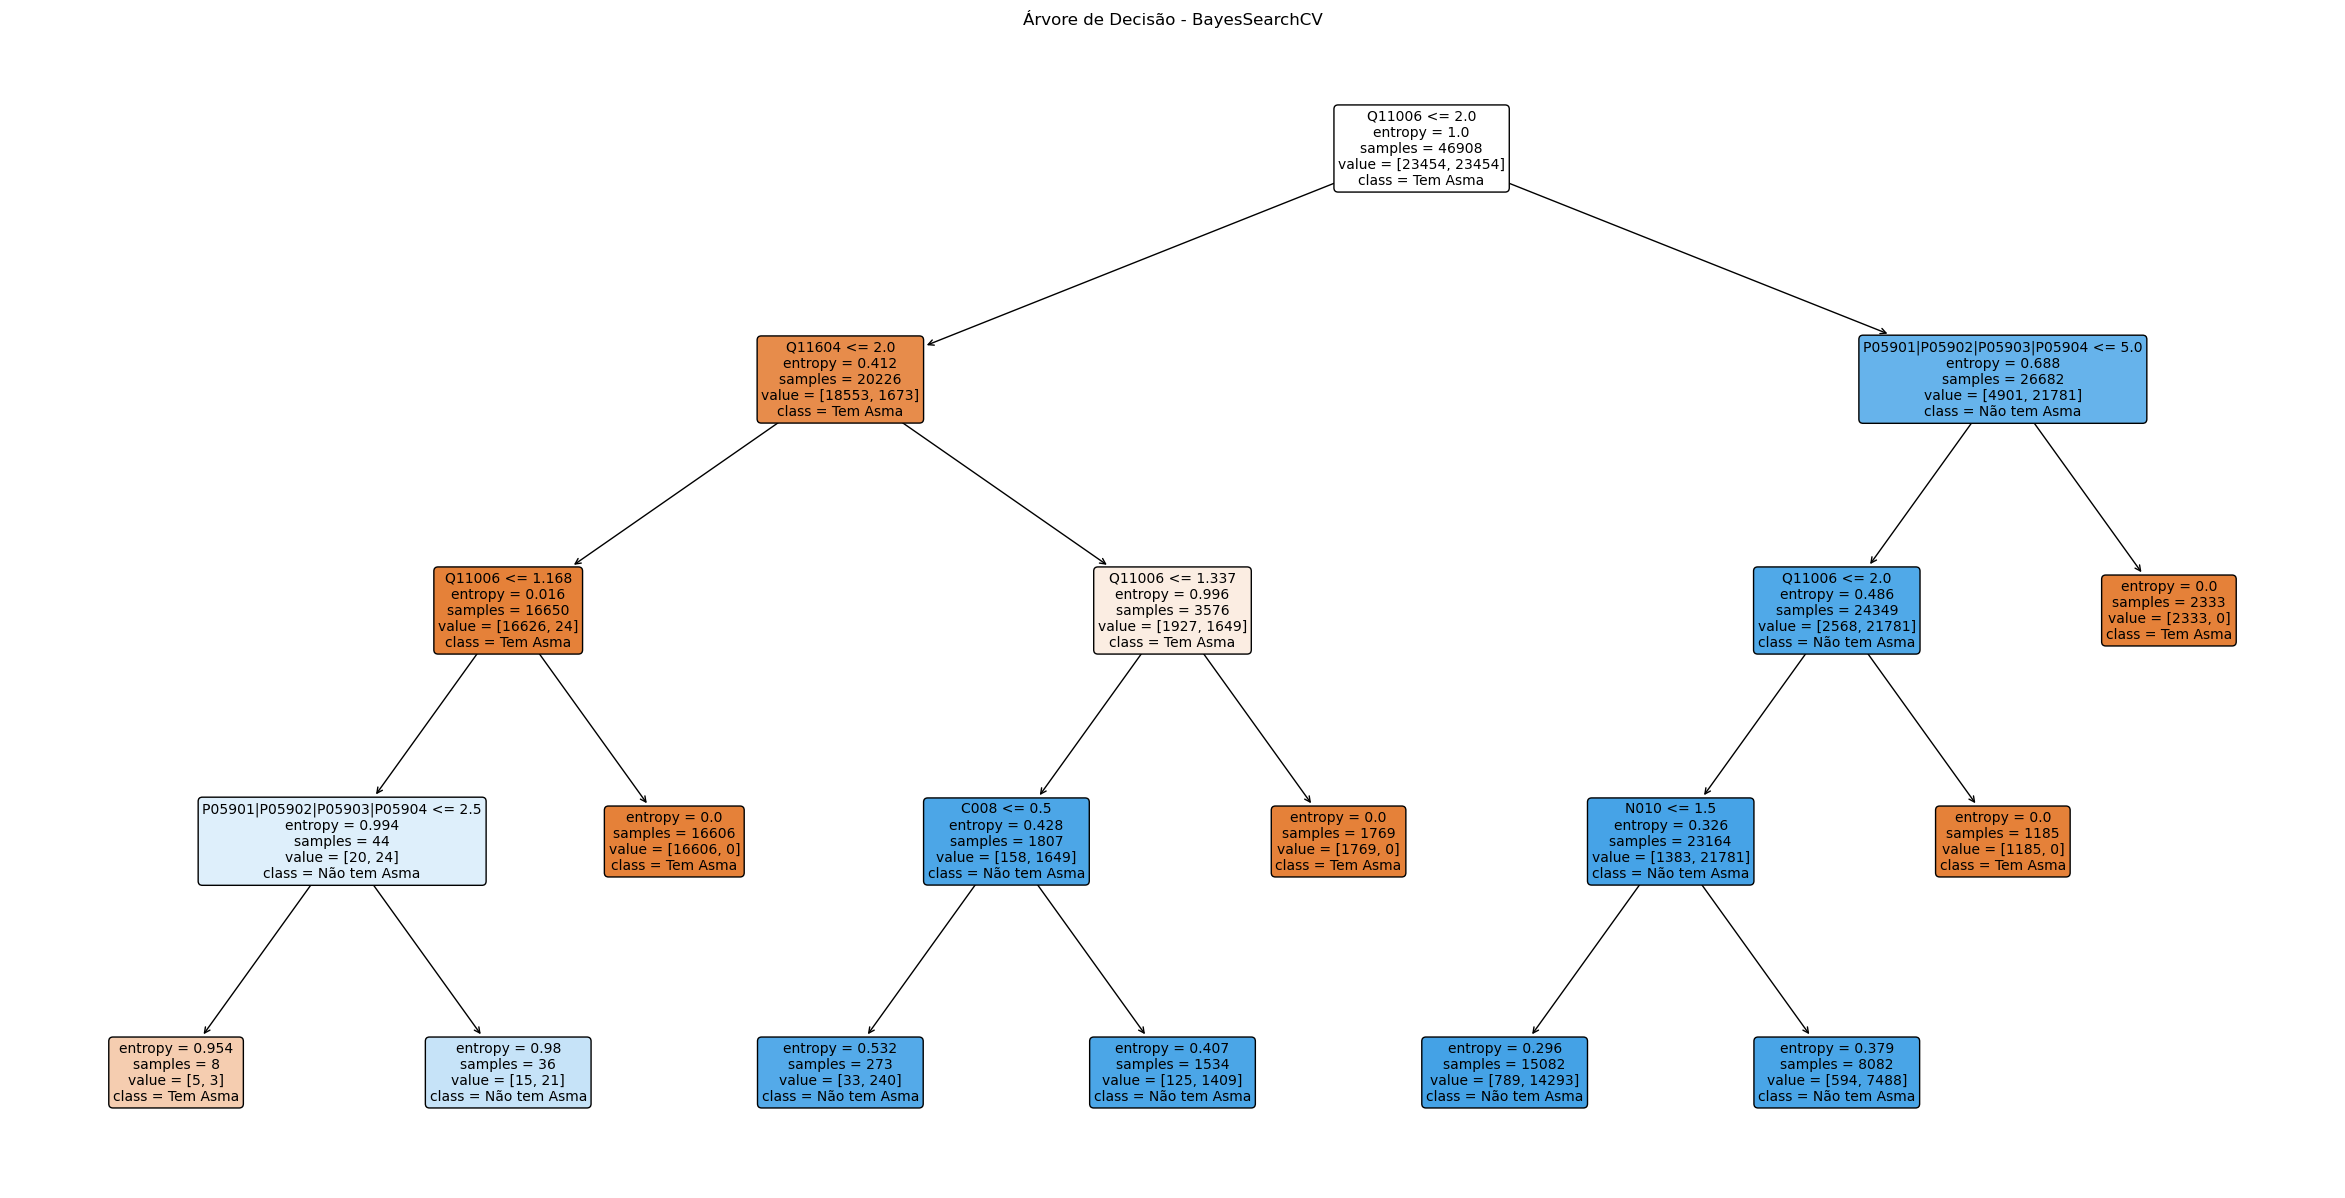

In [ ]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [ ]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.71      0.01      0.02       633
           2       0.94      1.00      0.97     10089

    accuracy                           0.94     10722
   macro avg       0.83      0.50      0.49     10722
weighted avg       0.93      0.94      0.91     10722

